# Métodos baseados em Aproximação Linear (em construção)

Na aula anterior vimos o primeiro método para encontrar raízes de função, o método da Bisseção. Nesta aula, veremos os seguintes métodos baseados em aproximação linear:
* método das secantes
* método da *regula falsi*
* método pégaso

Novamente, iremos assumir que $f$ é uma função contínua em um intervalo $[a,b]$ tal que $f(a)f(b) < 0$.

## Método das secantes

Neste método, dois pontos $(x_{k-1},f(x_{k-1})$ e $(x_k,f(x_k))$ são utilizados para fazer uma interpolação linear. A aproximação seguinte é dada pelo cruzamento desta reta com o eixo $x$:

$$
x_{k+1} = x_{k} - \frac{f(x_k)}{f(x_k) - f(x_{k-1})}(x_k - x_{k-1}).
$$

**Q:** Este método sempre converge? 

In [14]:
import numpy as np
np.set_printoptions(precision=2)
def Secantes(f,a,b, tol, maxiter=100):
    for i in range(maxiter):
        x = b - f(b)/(f(b)-f(a)) * (b-a)
        print('{} {:.5f} {:.5f} {:.5f} {:.5f} {:.5f} {:.5f}'.format(i,a,f(a),b,f(b),x,f(x)))
        a = b
        b = x
        if abs(b-a) <= tol or abs(f(x)) < tol:
            break
    return x

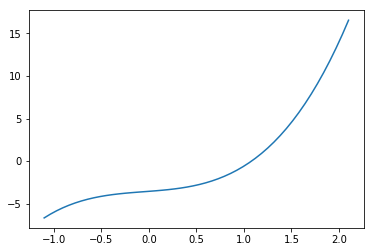

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 2*x**3 - np.cos(x+1) -3

x = np.linspace(-1.1,2.1)
y = f(x)

plt.plot(x,y)

In [16]:
Secantes(f,-1,2,1e-2)

0 -1.00000 -6.00000 2.00000 13.98999 -0.09955 -3.62323
1 2.00000 13.98999 -0.09955 -3.62323 0.33235 -3.16277
2 -0.09955 -3.62323 0.33235 -3.16277 3.29896 69.20802
3 0.33235 -3.16277 3.29896 69.20802 0.46200 -2.91136
4 3.29896 69.20802 0.46200 -2.91136 0.57652 -2.61103
5 0.46200 -2.91136 0.57652 -2.61103 1.57216 5.61394
6 0.57652 -2.61103 1.57216 5.61394 0.89259 -1.26146
7 1.57216 5.61394 0.89259 -1.26146 1.01727 -0.46278
8 0.89259 -1.26146 1.01727 -0.46278 1.08952 0.08239
9 1.01727 -0.46278 1.08952 0.08239 1.07860 -0.00411


1.0785992182051987

## Método da *regula falsi*

Este método pode ser visto como uma pequena modificação do método das secantes de forma a garantir que o intervalo considerado seja sempre reduzido e que ele sempre contenha uma raiz.

Na prática, o ponto $x$ substitui um ponto-base se suas imagens tiverem o mesmo sinal.

**Q**: Este método sempre converge?

**Q**: Qual a vantagem do método das secantes?

In [17]:
def RegulaFalsi(f,a,b, tol, maxiter=100):
    for i in range(maxiter):
        x = b - f(b)/(f(b)-f(a)) * (b-a)
        print('{} {:.5f} {:.5f} {:.5f} {:.5f} {:.5f} {:.5f}'.format(i,a,f(a),b,f(b),x,f(x)))
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x
        if abs(b-a) <= tol or abs(f(x)) < tol:
            break
    return x

RegulaFalsi(f,-1,2,1e-2)

0 -1.00000 -6.00000 2.00000 13.98999 -0.09955 -3.62323
1 -0.09955 -3.62323 2.00000 13.98999 0.33235 -3.16277
2 0.33235 -3.16277 2.00000 13.98999 0.63985 -2.40710
3 0.63985 -2.40710 2.00000 13.98999 0.83952 -1.55114
4 0.83952 -1.55114 2.00000 13.98999 0.95534 -0.88102
5 0.95534 -0.88102 2.00000 13.98999 1.01723 -0.46306
6 1.01723 -0.46306 2.00000 13.98999 1.04872 -0.23328
7 1.04872 -0.23328 2.00000 13.98999 1.06432 -0.11498
8 1.06432 -0.11498 2.00000 13.98999 1.07195 -0.05607
9 1.07195 -0.05607 2.00000 13.98999 1.07565 -0.02719
10 1.07565 -0.02719 2.00000 13.98999 1.07745 -0.01315
11 1.07745 -0.01315 2.00000 13.98999 1.07831 -0.00636


1.0783129973533456

Vimos um exemplo nos slides em que a retenção de um dos pontos-base faz com que a convergência seja lenta. Existem muitas variantes do *regula falsi* que corrigem este problema reduzindo a ordenada do ponto-base retido, multiplicando-o por um fator de correção.

A seguir, veremos uma dessas variantes, conhecida como método pégaso.

## Método pégaso

No método pégaso, continuamos a usar dois pontos-base $a$ e $b$ tais que $f(a)f(b) < 0$ para fazer uma interpolação linear. Contudo, se o ponto-base $a$ já foi usado como ponto-base $a$ na iteração anterior, em vez de utilizar o valor de sua imagem, iremos utilizar este valor multiplicado por um fator de redução.

É importante manter a variável Fa ao invés de calcular $f(a)$ a cada iteração, pois assim podemos guardar os valores reduzidos das imagens. **Nota:** constuma-se armazenar $f(b)$ em uma variável Fb também, apenas por conveniência.

In [ ]:
def Pegaso(f,a,b, tol):
    # to be continued...